##Unsupervised learning for red wine characteristics



In [1]:
#Import data
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis:

**1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)**

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

In [3]:
#Preprocessing
import numpy as np
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


Text(0.5, 1.0, 'Elbow curve')

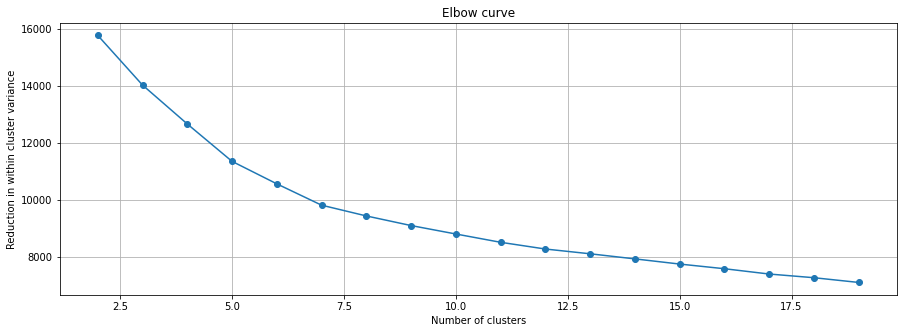

In [4]:
#Plot elbow chart
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

within_cluster_variance = []

for k in range(2, 20):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variance')
plt.title('Elbow curve')


From the elbow chart above it seems that 7 clusters is optimal to maximize the number of "good" and "bad" wines into unique clusters.

In [5]:
kmeans = KMeans(n_clusters=7, random_state=123)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df["clusters"] = y_kmeans
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-0.42660257  0.67489303 -0.7842663  -0.19524638 -0.04593752 -0.48383984
  -0.40847577  0.01427278  0.33986285 -0.41883696 -0.51416701 -0.52221072]
 [-1.07573563  0.35570227 -0.9234422  -0.27567244 -0.41151592  0.26269473
  -0.17247274 -1.32451349  1.13874917 -0.1305897   1.16211886  0.50631124]
 [ 0.18859275 -1.00398517  0.71566737 -0.11098365 -0.2708235  -0.32732638
  -0.53653696 -0.55467307 -0.20332879  0.45680083  0.99622069  1.03933572]
 [-0.08563321 -0.03465216  0.41485574  4.96176756  0.29638789  1.75019116
   1.69583213  1.22500051 -0.3254596  -0.02378933 -0.363913   -0.02276114]
 [-0.12260814  0.02535443  0.05792118 -0.02205793 -0.03987277  0.99622043
   1.22812109  0.20558731 -0.09834558 -0.1731195  -0.57103591 -0.42026448]
 [ 1.64984034 -0.57407186  1.23962759  0.11661625  0.06548436 -0.49958739
  -0.44634616  1.14187843 -0.98218979  0.24369805 -0.05484931  0.13134988]
 [ 0.08183134  0.01795477  1.14417813 -0.39939594  5.60473128 -0.070479
   0.47441556  0.18580277 -1.68735

In [7]:
#Counting number of wines in each quality and sorting
df["quality"].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [8]:
#Cross-tabulating clusters with quality columns
pd.crosstab(df["clusters"], df["quality"])

quality,3,4,5,6,7,8
clusters,,,,,,
0,7,40,284,150,4,0
1,0,2,32,126,37,4
2,0,1,11,125,111,13
3,0,1,16,12,5,0
4,1,4,232,94,6,0
5,2,4,88,122,35,1
6,0,1,18,9,1,0


Suppose wines of quality 3-4 are deemed "bad" and quality 7-8 are deemed "good". Cluster 0 has the most amount of "bad" wines (47/63) and cluster 2 has the most amount of "good" wines (124/217).

In [9]:
df['clusters'] = kmeans.labels_

#Group by clusters
display(df.groupby('clusters').mean()) #cluster means
df.groupby('clusters').groups

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
clusters,,,,,,,,,,,,
0,7.577113,0.648629,0.118247,2.263608,0.085305,10.815464,33.035052,0.996774,3.363567,0.587175,9.875223,5.214433
1,6.447264,0.591493,0.091144,2.150249,0.068104,18.621891,40.796020,0.994248,3.486866,0.636020,11.661028,6.044776
2,8.647893,0.348103,0.410345,2.382375,0.074724,12.452107,28.823755,0.995700,3.279732,0.735556,11.484291,6.475096
3,8.170588,0.521618,0.351765,9.532353,0.101412,34.176471,102.235294,0.999058,3.260882,0.654118,10.035294,5.617647
4,8.106231,0.532359,0.282255,2.507715,0.085591,26.292285,86.854599,0.997135,3.295935,0.628813,9.814639,5.296736
5,11.191270,0.425060,0.512381,2.703175,0.090548,10.650794,31.789683,0.998901,3.159524,0.699444,10.364550,5.742063
6,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828


{0: [0, 1, 2, 4, 5, 6, 8, 10, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 38, 41, 43, 44, 48, 50, 51, 52, 55, 58, 59, 62, 63, 64, 65, 66, 67, 69, 70, 73, 77, 78, 80, 85, 87, 89, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 110, 114, 116, 117, 118, 120, 121, 122, 123, 126, 127, 129, 133, 134, 135, 136, 137, 140, 141, 143, 148, 158, 160, 161, 162, 167, 168, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, ...], 1: [7, 12, 45, 94, 95, 131, 132, 142, 144, 146, 173, 198, 230, 334, 346, 355, 390, 421, 425, 426, 444, 553, 569, 571, 588, 609, 695, 708, 729, 755, 756, 802, 821, 828, 829, 831, 836, 837, 855, 859, 861, 866, 867, 868, 869, 870, 871, 877, 881, 888, 895, 897, 901, 902, 903, 904, 907, 908, 916, 919, 922, 939, 958, 982, 985, 996, 997, 999, 1024, 1027, 1029, 1030, 1031, 1044, 1045, 1046, 1052, 1064, 1066, 1092, 1101, 1102, 1103, 1105, 1111, 1114, 1115, 1116, 1117, 1118, 1119, 1121, 1122, 1126, 1127, 1142, 1151, 1154, 1157, 1171, ...], 2: [37, 84, 1

In [10]:
#Sort by quality
df.groupby('clusters').mean().sort_values('quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
clusters,,,,,,,,,,,,
2,8.647893,0.348103,0.410345,2.382375,0.074724,12.452107,28.823755,0.995700,3.279732,0.735556,11.484291,6.475096
1,6.447264,0.591493,0.091144,2.150249,0.068104,18.621891,40.796020,0.994248,3.486866,0.636020,11.661028,6.044776
5,11.191270,0.425060,0.512381,2.703175,0.090548,10.650794,31.789683,0.998901,3.159524,0.699444,10.364550,5.742063
3,8.170588,0.521618,0.351765,9.532353,0.101412,34.176471,102.235294,0.999058,3.260882,0.654118,10.035294,5.617647
6,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828
4,8.106231,0.532359,0.282255,2.507715,0.085591,26.292285,86.854599,0.997135,3.295935,0.628813,9.814639,5.296736
0,7.577113,0.648629,0.118247,2.263608,0.085305,10.815464,33.035052,0.996774,3.363567,0.587175,9.875223,5.214433


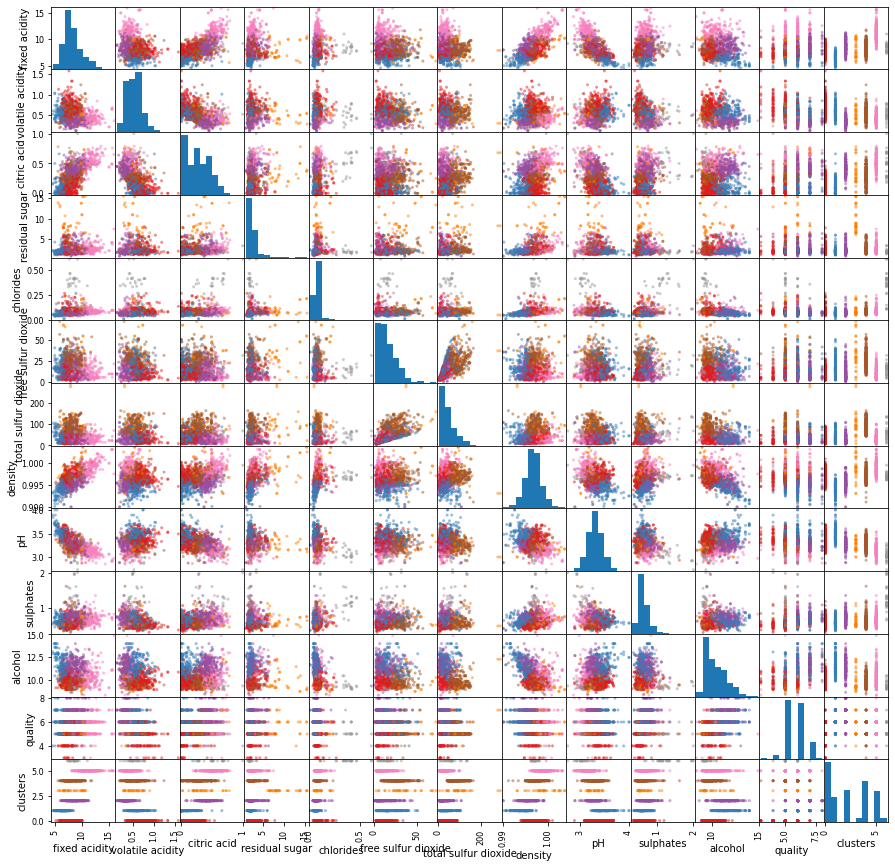

In [11]:
#Scatter Matrix
g = pd.plotting.scatter_matrix(df, c=kmeans.labels_, cmap='Set1', figsize = (15,15))

From the table above it is evident that Cluster 2 represent higher quality wines. The most distinct features of high quality wines include average levels of fixed acidity, low volatile acidity, above average levels of citric acid, average sugar levels, low free and total sulfur dioxide, average pH, and high alcohol levels.

Cluster 0 is representative of low quality wines, with features like low fixed acidity, high volatile acidity, low citric acid, average sugar and chloride levels, above average pH, and low alcohol levels.

**2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.**

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [12]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

row_clusters

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [7.87000000e+02, 7.88000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.22900000e+03, 1.23200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.19000000e+03, 3.19200000e+03, 9.77824373e+01, 1.46800000e+03],
       [3.19300000e+03, 3.19400000e+03, 1.69309868e+02, 1.59700000e+03],
       [3.10400000e+03, 3.19500000e+03, 2.85231569e+02, 1.59900000e+03]])

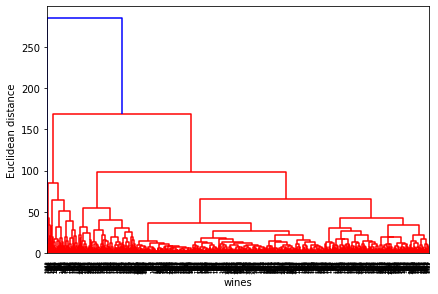

In [13]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_den = dendrogram(row_clusters)
plt.tight_layout()
plt.xlabel('wines')
plt.ylabel('Euclidean distance')

plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
print(labels)
df["h_clusters"] = labels
print(df["h_clusters"].describe())

[2 2 2 ... 2 2 2]
count    1599.000000
mean        1.931207
std         0.886709
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: h_clusters, dtype: float64


In [15]:
pd.crosstab(df["h_clusters"], df["quality"])

quality,3,4,5,6,7,8
h_clusters,,,,,,
0,7,9,19,70,22,3
1,0,2,37,23,1,0
2,3,40,608,517,157,12
3,0,1,1,0,0,0
4,0,0,0,1,2,0
5,0,0,13,19,16,3
6,0,1,3,8,1,0


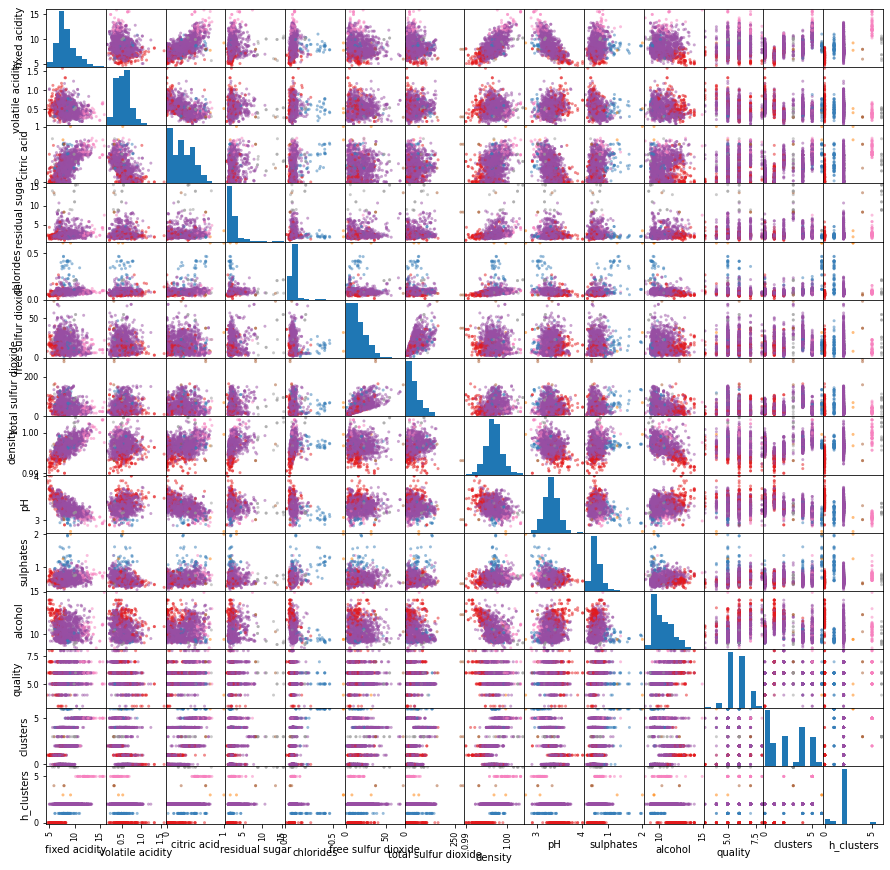

In [16]:
g2 = pd.plotting.scatter_matrix(df, c=ac.labels_, cmap='Set1', figsize=(15,15))

Using hierarchical clustering returns a suboptimal identification of wine quality. As seen from the chart and scatter matrix above, a vast majority of wines are concentrated in Cluster 2, while Clusters 3 and 4 consist of only 2 and 3 wines, respectively. 

Hierarchical clustering method does not seem to be effective in determining wine quality compared to K-means clustering.

**3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components.**

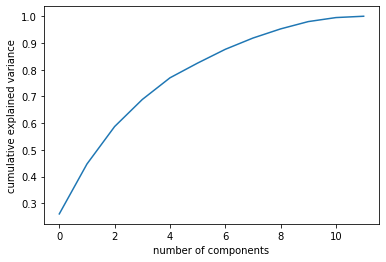

In [17]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [19]:
pca.explained_variance_ratio_.sum()

0.4469208117069174

The first 2 components explain about 44.7% of variation.

In [20]:
#Limit number of components given pct of variance explained
pca = PCA(0.70).fit(X)
print(pca.n_components_)

pca = PCA(0.80).fit(X)
print(pca.n_components_)

pca = PCA(0.95).fit(X)
print(pca.n_components_)

5
6
9


95% variance is explained when using 9 PCA vectors.

**How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?**

We could run a supervised regression model such as k-nearest neighbors and decision tree regressor on the wine attributes using the z-score achieved by the first 2 principal components. Then we can determine other variables such wine price given the z-score for a new wine.